# Import Library

In [ ]:
# ===== Standard Library =====
import os
import shutil
import random

# ===== Numerical & Data Handling =====
import numpy as np
import pandas as pd

# ===== Visualization =====
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

# ===== Machine Learning =====
from sklearn.metrics import (
    accuracy_score,
    precision_recall_fscore_support,
    confusion_matrix
)

# ===== TensorFlow & Keras Core =====
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers

# ===== Pretrained Models =====
from tensorflow.keras.applications import (
    ResNet50,
    MobileNetV2,
    EfficientNetB0
)

# ===== Preprocessing Functions =====
from tensorflow.keras.applications.resnet50 import (
    preprocess_input as preprocess_resnet
)
from tensorflow.keras.applications.mobilenet_v2 import (
    preprocess_input as preprocess_mobilenet
)
from tensorflow.keras.applications.efficientnet import (
    preprocess_input as preprocess_efficient
)

# ===== Callbacks =====
from tensorflow.keras.callbacks import (
    EarlyStopping,
    ModelCheckpoint,
    ReduceLROnPlateau
)

2026-01-05 23:26:23.627418: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1767655583.804281      24 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1767655583.854160      24 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1767655584.276513      24 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1767655584.276560      24 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1767655584.276563      24 computation_placer.cc:177] computation placer alr

# Data Preparation

In [ ]:
!ls /kaggle/input/plantvillage-dataset/color

 Apple___Apple_scab
 Apple___Black_rot
 Apple___Cedar_apple_rust
 Apple___healthy
 Blueberry___healthy
'Cherry_(including_sour)___healthy'
'Cherry_(including_sour)___Powdery_mildew'
'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot'
'Corn_(maize)___Common_rust_'
'Corn_(maize)___healthy'
'Corn_(maize)___Northern_Leaf_Blight'
 Grape___Black_rot
'Grape___Esca_(Black_Measles)'
 Grape___healthy
'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)'
'Orange___Haunglongbing_(Citrus_greening)'
 Peach___Bacterial_spot
 Peach___healthy
 Pepper,_bell___Bacterial_spot
 Pepper,_bell___healthy
 Potato___Early_blight
 Potato___healthy
 Potato___Late_blight
 Raspberry___healthy
 Soybean___healthy
 Squash___Powdery_mildew
 Strawberry___healthy
 Strawberry___Leaf_scorch
 Tomato___Bacterial_spot
 Tomato___Early_blight
 Tomato___healthy
 Tomato___Late_blight
 Tomato___Leaf_Mold
 Tomato___Septoria_leaf_spot
'Tomato___Spider_mites Two-spotted_spider_mite'
 Tomato___Target_Spot
 Tomato___Tomato_mosaic_virus
 Tomato_

In [ ]:
# CONFIG
SOURCE_DIR = "/kaggle/input/plantvillage-dataset/color"
TARGET_DIR = "/kaggle/working/tomato_split"

TRAIN_RATIO = 0.8
VAL_RATIO   = 0.1
TEST_RATIO  = 0.1
SEED = 42

random.seed(SEED)

TOMATO_CLASSES = [
    "Tomato___Bacterial_spot",
    "Tomato___Early_blight",
    "Tomato___healthy",
    "Tomato___Late_blight",
    "Tomato___Leaf_Mold",
    "Tomato___Septoria_leaf_spot",
    "Tomato___Spider_mites Two-spotted_spider_mite",
    "Tomato___Target_Spot",
    "Tomato___Tomato_mosaic_virus",
    "Tomato___Tomato_Yellow_Leaf_Curl_Virus"
]

## Data Splitting 80:10:10

In [ ]:
# CREATE OUTPUT FOLDERS

for split in ["train", "val", "test"]:
    for cls in TOMATO_CLASSES:
        os.makedirs(os.path.join(TARGET_DIR, split, cls), exist_ok=True)

print("[INFO] Folder structure created.")

# SPLIT & COPY DATA

for cls in TOMATO_CLASSES:
    src_cls_dir = os.path.join(SOURCE_DIR, cls)

    if not os.path.isdir(src_cls_dir):
        print(f"[WARNING] Class not found: {cls}")
        continue

    images = [
        f for f in os.listdir(src_cls_dir)
        if f.lower().endswith((".jpg", ".jpeg", ".png"))
    ]

    random.shuffle(images)

    total = len(images)
    n_train = int(total * TRAIN_RATIO)
    n_val   = int(total * VAL_RATIO)

    train_imgs = images[:n_train]
    val_imgs   = images[n_train:n_train + n_val]
    test_imgs  = images[n_train + n_val:]

    def copy_images(img_list, split_name):
        for img in img_list:
            src = os.path.join(src_cls_dir, img)
            dst = os.path.join(TARGET_DIR, split_name, cls, img)
            shutil.copy2(src, dst)

    copy_images(train_imgs, "train")
    copy_images(val_imgs, "val")
    copy_images(test_imgs, "test")

    print(
        f"[OK] {cls}: "
        f"{len(train_imgs)} train | "
        f"{len(val_imgs)} val | "
        f"{len(test_imgs)} test"
    )

print("\n[SUCCESS] Tomato dataset splitting completed!")

[INFO] Folder structure created.
[OK] Tomato___Bacterial_spot: 1701 train | 212 val | 214 test
[OK] Tomato___Early_blight: 800 train | 100 val | 100 test
[OK] Tomato___healthy: 1272 train | 159 val | 160 test
[OK] Tomato___Late_blight: 1527 train | 190 val | 192 test
[OK] Tomato___Leaf_Mold: 761 train | 95 val | 96 test
[OK] Tomato___Septoria_leaf_spot: 1416 train | 177 val | 178 test
[OK] Tomato___Spider_mites Two-spotted_spider_mite: 1340 train | 167 val | 169 test
[OK] Tomato___Target_Spot: 1123 train | 140 val | 141 test
[OK] Tomato___Tomato_mosaic_virus: 298 train | 37 val | 38 test
[OK] Tomato___Tomato_Yellow_Leaf_Curl_Virus: 4285 train | 535 val | 537 test

[SUCCESS] Tomato dataset splitting completed!


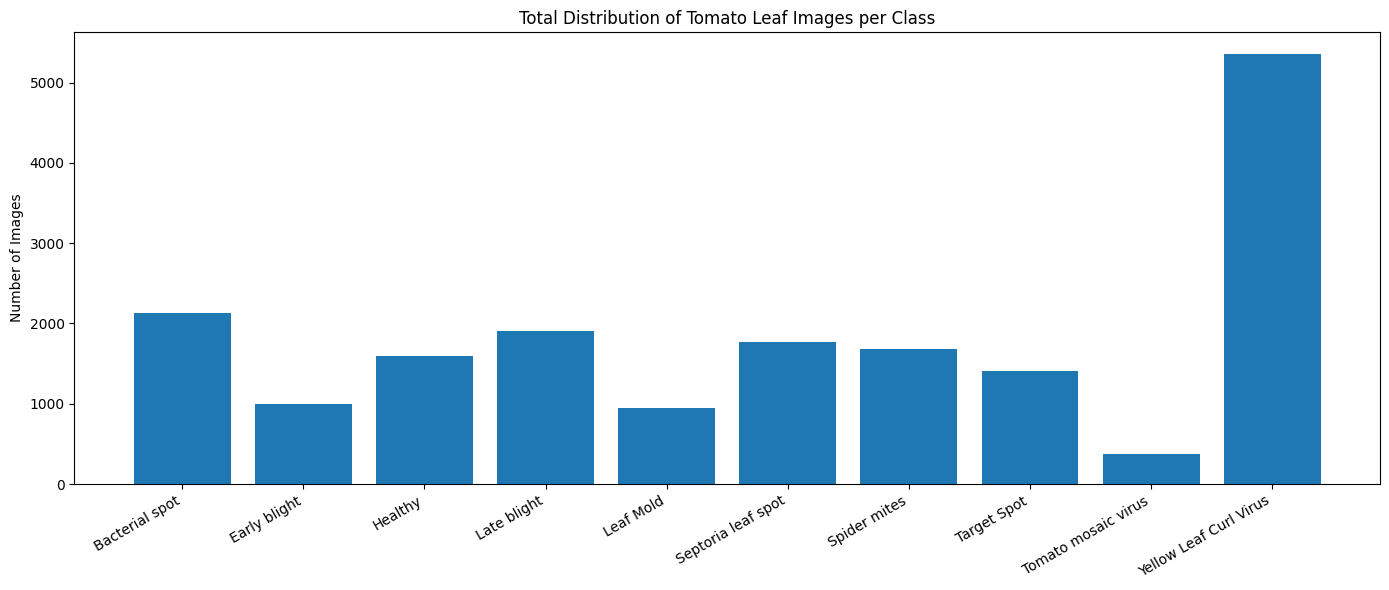

In [ ]:
def plot_class_distribution_total():
    data = {
        "class": [
            "Bacterial spot",
            "Early blight",
            "Healthy",
            "Late blight",
            "Leaf Mold",
            "Septoria leaf spot",
            "Spider mites",
            "Target Spot",
            "Tomato mosaic virus",
            "Yellow Leaf Curl Virus"
        ],
        "total_images": [
            2127,
            1000,
            1591,
            1909,
            952,
            1771,
            1676,
            1404,
            373,
            5357
        ]
    }

    df = pd.DataFrame(data)

    plt.figure(figsize=(14, 6))
    plt.bar(df["class"], df["total_images"])
    plt.ylabel("Number of Images")
    plt.title("Total Distribution of Tomato Leaf Images per Class")
    plt.xticks(rotation=30, ha="right")
    plt.tight_layout()
    plt.show()


plot_class_distribution_total()

## Image Sample from Each Tomato Class

In [ ]:
def plot_one_sample_per_class(
    dataset_dir,
    classes,
    split="train",
    img_size=(224, 224),
    cols=5,
    seed=42
):
    random.seed(seed)

    n = len(classes)
    rows = (n + cols - 1) // cols
    fig = plt.figure(figsize=(cols * 4, rows * 4))

    for i, cls in enumerate(classes):
        cls_dir = os.path.join(dataset_dir, split, cls)
        imgs = [f for f in os.listdir(cls_dir) if f.lower().endswith((".jpg", ".png", ".jpeg"))]
        img = Image.open(os.path.join(cls_dir, random.choice(imgs))).convert("RGB")
        img = img.resize(img_size)

        ax = fig.add_subplot(rows, cols, i + 1)
        ax.imshow(img)
        ax.set_xticks([])
        ax.set_yticks([])

        for spine in ax.spines.values():
            spine.set_visible(True)
            spine.set_linewidth(1)

        ax.text(
            0.5, -0.08,
            cls.replace("Tomato___", ""),
            ha="center",
            va="top",
            transform=ax.transAxes,
            fontsize=10
        )

    plt.subplots_adjust(hspace=0.35, wspace=0.15)
    plt.show()


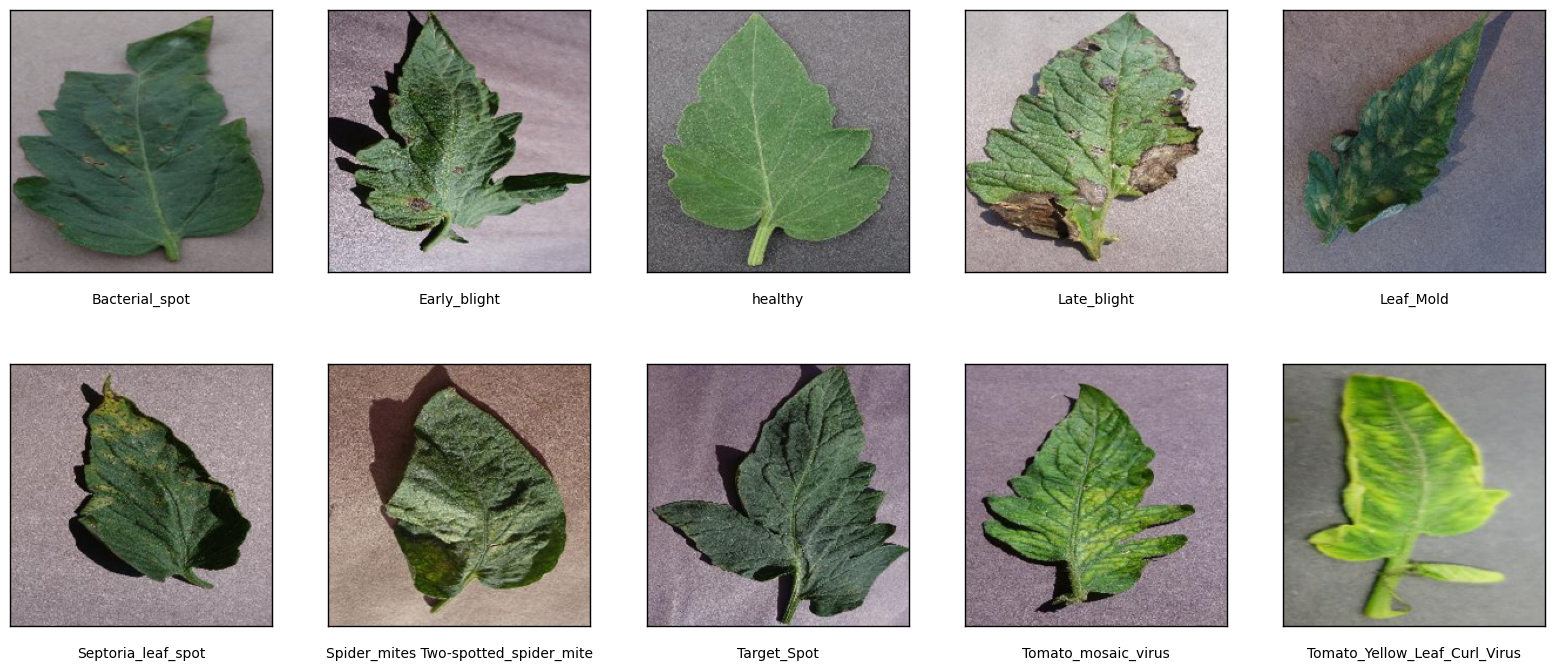

In [ ]:
DATASET_DIR = "/kaggle/working/tomato_split"

plot_one_sample_per_class(
    dataset_dir=DATASET_DIR,
    classes=TOMATO_CLASSES,
    split="train",
    img_size=(224, 224),
    cols=5
)

# Data Preprocessing

## tf.data Dataset Generation (Resizing, Batching, Shuffling, and Model-Specific Preprocessing)

In [ ]:
root = "/kaggle/working/tomato_split/"
train_dir = root + "train"
test_dir = root + "test"
val_dir = root + "val"

IMG_SIZE = (224, 224)
BATCH_SIZE = 32
SEED = 42

In [ ]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2)
], name="data_augmentation")

I0000 00:00:1767655668.051769      24 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1767655668.052488      24 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


In [ ]:
def load_dataset(
    directory,
    preprocess_fn,
    augment=False,
    shuffle=True
):
    ds = tf.keras.utils.image_dataset_from_directory(
        directory,
        image_size=IMG_SIZE,
        batch_size=BATCH_SIZE,
        label_mode="categorical",
        shuffle=shuffle,
        seed=SEED
    )

    def apply_ops(x, y):
        if augment:
            x = data_augmentation(x, training=True)
        x = preprocess_fn(x)
        return x, y

    ds = ds.map(
        apply_ops,
        num_parallel_calls=tf.data.AUTOTUNE
    )

    return ds.prefetch(tf.data.AUTOTUNE)


In [ ]:
train_resnet = load_dataset(
    train_dir,
    preprocess_resnet,
    augment=True,
    shuffle=True
)

val_resnet = load_dataset(
    val_dir,
    preprocess_resnet,
    augment=False,
    shuffle=False
)

test_resnet = load_dataset(
    test_dir,
    preprocess_resnet,
    shuffle=False
)

Found 14523 files belonging to 10 classes.
Found 1812 files belonging to 10 classes.
Found 1825 files belonging to 10 classes.


In [ ]:
train_mobilenet = load_dataset(
    train_dir,
    preprocess_mobilenet,
    augment=True,
    shuffle=True
)

val_mobilenet = load_dataset(
    val_dir,
    preprocess_mobilenet,
    augment=False,
    shuffle=False
)

test_mobilenet = load_dataset(
    test_dir,
    preprocess_mobilenet,
    augment=False,
    shuffle=False
)


Found 14523 files belonging to 10 classes.
Found 1812 files belonging to 10 classes.
Found 1825 files belonging to 10 classes.


In [ ]:
train_efficient = load_dataset(
    train_dir,
    preprocess_efficient,
    augment=True,
    shuffle=True
)

val_efficient = load_dataset(
    val_dir,
    preprocess_efficient,
    augment=False,
    shuffle=False
)

test_efficient = load_dataset(
    test_dir,
    preprocess_efficient,
    augment=False,
    shuffle=False
)


Found 14523 files belonging to 10 classes.
Found 1812 files belonging to 10 classes.
Found 1825 files belonging to 10 classes.


# Modelling

In [ ]:
DATASET_DIR = "/kaggle/working/tomato_split"

IMG_SIZE = (224, 224)
BATCH_SIZE = 32
SEED = 42

NUM_CLASSES = 10
INPUT_SHAPE = (224, 224, 3)

EPOCHS_FREEZE_ALL = 30
EPOCHS_FREEZE = 10
EPOCHS_FINE   = 20

LR_HEAD = 1e-3
LR_FINE = 1e-4

## Helper function

In [ ]:
def build_model(base_model):
    x = base_model.output
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dense(256, activation="relu")(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(NUM_CLASSES, activation="softmax")(x)
    return models.Model(base_model.input, outputs)


In [ ]:
def freeze_backbone(base_model):
    for layer in base_model.layers:
        layer.trainable = False


def unfreeze_backbone(base_model, unfreeze_ratio):
    total = len(base_model.layers)
    unfreeze_from = int(total * (1 - unfreeze_ratio))
    for layer in base_model.layers[unfreeze_from:]:
        layer.trainable = True


In [ ]:
def get_callbacks(model_name, stage):
    return [
        EarlyStopping(
            monitor="val_loss",
            patience=5,
            restore_best_weights=True
        ),
        ModelCheckpoint(
            filepath=f"{model_name}_{stage}.keras",
            monitor="val_loss",
            save_best_only=True
        ),
        ReduceLROnPlateau(
            monitor="val_loss",
            factor=0.3,
            patience=3,
            min_lr=1e-6
        )
    ]

## Epoch Visualization Function

In [ ]:
def merge_histories(hist_stage1, hist_stage2):
    merged = {}
    for key in hist_stage1.history:
        merged[key] = hist_stage1.history[key] + hist_stage2.history[key]
    return merged

In [ ]:
def plot_training_history(history, title=None, ft_start_epoch=None):
    if hasattr(history, "history"):
        history = history.history

    epochs = range(1, len(history["loss"]) + 1)

    plt.figure(figsize=(12, 4))

    # ===== Accuracy =====
    plt.subplot(1, 2, 1)
    plt.plot(epochs, history["accuracy"], label="Train")
    plt.plot(epochs, history["val_accuracy"], label="Validation")

    if ft_start_epoch is not None:
        plt.axvline(
            x=ft_start_epoch,
            color="green",
            linestyle="--",
            label="Fine-tuning start"
        )

    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid(True)

    # ===== Loss =====
    plt.subplot(1, 2, 2)
    plt.plot(epochs, history["loss"], label="Train")
    plt.plot(epochs, history["val_loss"], label="Validation")

    if ft_start_epoch is not None:
        plt.axvline(
            x=ft_start_epoch,
            color="green",
            linestyle="--"
        )

    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid(True)

    if title:
        plt.suptitle(title, fontsize=14)

    plt.tight_layout()
    plt.show()

## ResNet50

### Skema 1 Freeze all

In [ ]:
base = ResNet50(
    weights="imagenet",
    include_top=False,
    input_shape=INPUT_SHAPE
)

model_rn_freeze = build_model(base)
freeze_backbone(base)

model_rn_freeze.compile(
    optimizer=optimizers.Adam(LR_HEAD),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

hist_rn_freeze = model_rn_freeze.fit(
    train_resnet,
    validation_data=val_resnet,
    epochs=EPOCHS_FREEZE_ALL,
    callbacks=get_callbacks("resnet50", "freeze_all")
)

loss_A, acc_A = model_rn_freeze.evaluate(test_resnet)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/30


I0000 00:00:1767655682.699345      72 service.cc:152] XLA service 0x7dc950003ef0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1767655682.699413      72 service.cc:160]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1767655682.699421      72 service.cc:160]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1767655684.773047      72 cuda_dnn.cc:529] Loaded cuDNN version 91002


  1/454 ━━━━━━━━━━━━━━━━━━━━ 1:49:28 15s/step - accuracy: 0.1250 - loss: 3.8335

I0000 00:00:1767655689.925198      72 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


454/454 ━━━━━━━━━━━━━━━━━━━━ 101s 191ms/step - accuracy: 0.7334 - loss: 0.9309 - val_accuracy: 0.8940 - val_loss: 0.3257 - learning_rate: 0.0010
Epoch 2/30
454/454 ━━━━━━━━━━━━━━━━━━━━ 75s 163ms/step - accuracy: 0.8916 - loss: 0.3400 - val_accuracy: 0.9205 - val_loss: 0.2545 - learning_rate: 0.0010
Epoch 3/30
454/454 ━━━━━━━━━━━━━━━━━━━━ 74s 161ms/step - accuracy: 0.9119 - loss: 0.2774 - val_accuracy: 0.8797 - val_loss: 0.4229 - learning_rate: 0.0010
Epoch 4/30
454/454 ━━━━━━━━━━━━━━━━━━━━ 82s 161ms/step - accuracy: 0.9281 - loss: 0.2283 - val_accuracy: 0.9034 - val_loss: 0.3104 - learning_rate: 0.0010
Epoch 5/30
454/454 ━━━━━━━━━━━━━━━━━━━━ 74s 161ms/step - accuracy: 0.9313 - loss: 0.2118 - val_accuracy: 0.9034 - val_loss: 0.3334 - learning_rate: 0.0010
Epoch 6/30
454/454 ━━━━━━━━━━━━━━━━━━━━ 77s 168ms/step - accuracy: 0.9451 - loss: 0.1711 - val_accuracy: 0.9277 - val_loss: 0.2294 - learning_rate: 3.0000e-04
Epoch 7/30
454/454 ━━━━━━━━━━━━━━━━━━━━ 74s 163ms/step - accuracy: 0.9521 - 

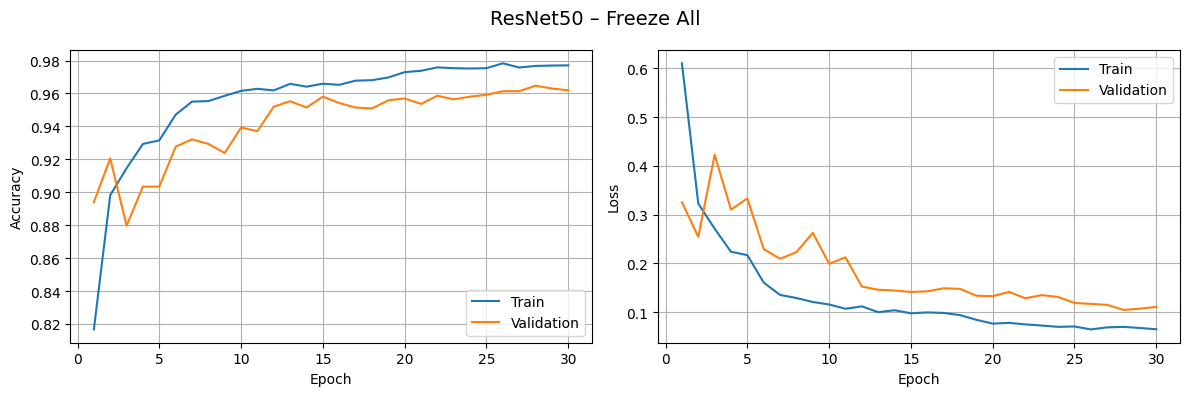

In [ ]:
plot_training_history(
    hist_rn_freeze,
    title="ResNet50 – Freeze All"
)

### Skema 2 Fine tuning 20% layer

In [ ]:
base = ResNet50(
    weights="imagenet",
    include_top=False,
    input_shape=INPUT_SHAPE
)

model_resnet_ft20 = build_model(base)
freeze_backbone(base)

model_resnet_ft20.compile(
    optimizer=optimizers.Adam(LR_HEAD),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

hist_rn_ft20_stage1 = model_resnet_ft20.fit(
    train_resnet,
    validation_data=val_resnet,
    epochs=EPOCHS_FREEZE,
    initial_epoch=0,
    callbacks=get_callbacks("resnet50", "ft20_warmup")
)

Epoch 1/10
454/454 ━━━━━━━━━━━━━━━━━━━━ 94s 184ms/step - accuracy: 0.7517 - loss: 0.8271 - val_accuracy: 0.8825 - val_loss: 0.3915 - learning_rate: 0.0010
Epoch 2/10
454/454 ━━━━━━━━━━━━━━━━━━━━ 74s 161ms/step - accuracy: 0.8965 - loss: 0.3245 - val_accuracy: 0.8907 - val_loss: 0.4064 - learning_rate: 0.0010
Epoch 3/10
454/454 ━━━━━━━━━━━━━━━━━━━━ 76s 165ms/step - accuracy: 0.9175 - loss: 0.2511 - val_accuracy: 0.9007 - val_loss: 0.3850 - learning_rate: 0.0010
Epoch 4/10
454/454 ━━━━━━━━━━━━━━━━━━━━ 75s 163ms/step - accuracy: 0.9259 - loss: 0.2335 - val_accuracy: 0.9145 - val_loss: 0.2837 - learning_rate: 0.0010
Epoch 5/10
454/454 ━━━━━━━━━━━━━━━━━━━━ 75s 165ms/step - accuracy: 0.9272 - loss: 0.2267 - val_accuracy: 0.9387 - val_loss: 0.2047 - learning_rate: 0.0010
Epoch 6/10
454/454 ━━━━━━━━━━━━━━━━━━━━ 75s 165ms/step - accuracy: 0.9369 - loss: 0.1965 - val_accuracy: 0.9404 - val_loss: 0.2009 - learning_rate: 0.0010
Epoch 7/10
454/454 ━━━━━━━━━━━━━━━━━━━━ 74s 162ms/step - accuracy: 0.9

In [ ]:
unfreeze_backbone(base, 0.2)

model_resnet_ft20.compile(
    optimizer=optimizers.Adam(LR_FINE),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

hist_rn_ft20_stage2 = model_resnet_ft20.fit(
    train_resnet,
    validation_data=val_resnet,
    epochs=EPOCHS_FREEZE + EPOCHS_FINE,
    initial_epoch=EPOCHS_FREEZE,
    callbacks=get_callbacks("resnet50", "ft20")
)

loss_rn_B, acc_rn_B = model_resnet_ft20.evaluate(test_resnet)

Epoch 11/30
454/454 ━━━━━━━━━━━━━━━━━━━━ 114s 206ms/step - accuracy: 0.9415 - loss: 0.1794 - val_accuracy: 0.9581 - val_loss: 0.1496 - learning_rate: 1.0000e-04
Epoch 12/30
454/454 ━━━━━━━━━━━━━━━━━━━━ 79s 172ms/step - accuracy: 0.9682 - loss: 0.0882 - val_accuracy: 0.9719 - val_loss: 0.0876 - learning_rate: 1.0000e-04
Epoch 13/30
454/454 ━━━━━━━━━━━━━━━━━━━━ 78s 171ms/step - accuracy: 0.9779 - loss: 0.0656 - val_accuracy: 0.9801 - val_loss: 0.0587 - learning_rate: 1.0000e-04
Epoch 14/30
454/454 ━━━━━━━━━━━━━━━━━━━━ 77s 169ms/step - accuracy: 0.9820 - loss: 0.0612 - val_accuracy: 0.9387 - val_loss: 0.3592 - learning_rate: 1.0000e-04
Epoch 15/30
454/454 ━━━━━━━━━━━━━━━━━━━━ 77s 169ms/step - accuracy: 0.9832 - loss: 0.0505 - val_accuracy: 0.9774 - val_loss: 0.0752 - learning_rate: 1.0000e-04
Epoch 16/30
454/454 ━━━━━━━━━━━━━━━━━━━━ 78s 169ms/step - accuracy: 0.9832 - loss: 0.0525 - val_accuracy: 0.9812 - val_loss: 0.0604 - learning_rate: 1.0000e-04
Epoch 17/30
454/454 ━━━━━━━━━━━━━━━━━━━

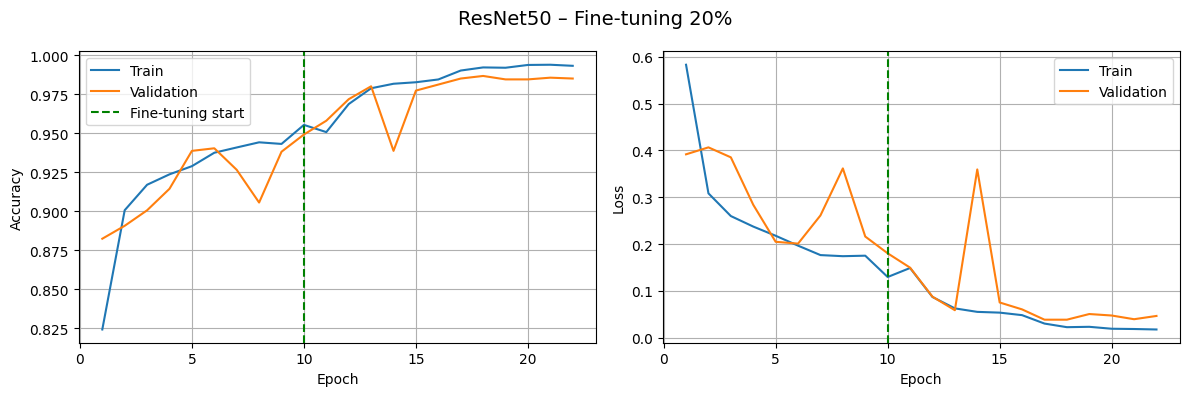

In [ ]:
hist_rn_ft20 = merge_histories(
    hist_rn_ft20_stage1,
    hist_rn_ft20_stage2
)

ft_start = len(hist_rn_ft20_stage1.history["loss"])

plot_training_history(
    hist_rn_ft20,
    title="ResNet50 – Fine-tuning 20%",
    ft_start_epoch=ft_start
)


### Skema 3 Fine Tuning 40%

In [ ]:
base = ResNet50(
    weights="imagenet",
    include_top=False,
    input_shape=INPUT_SHAPE
)

model_resnet_ft40 = build_model(base)
freeze_backbone(base)

model_resnet_ft40.compile(
    optimizer=optimizers.Adam(LR_HEAD),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

hist_rn_ft40_stage1 = model_resnet_ft40.fit(
    train_resnet,
    validation_data=val_resnet,
    epochs=EPOCHS_FREEZE,
    initial_epoch=0,
    callbacks=get_callbacks("resnet50", "ft40_warmup")
)

Epoch 1/10
454/454 ━━━━━━━━━━━━━━━━━━━━ 95s 184ms/step - accuracy: 0.7452 - loss: 0.8648 - val_accuracy: 0.8996 - val_loss: 0.3049 - learning_rate: 0.0010
Epoch 2/10
454/454 ━━━━━━━━━━━━━━━━━━━━ 75s 163ms/step - accuracy: 0.8974 - loss: 0.3283 - val_accuracy: 0.9134 - val_loss: 0.2959 - learning_rate: 0.0010
Epoch 3/10
454/454 ━━━━━━━━━━━━━━━━━━━━ 75s 165ms/step - accuracy: 0.9134 - loss: 0.2683 - val_accuracy: 0.9211 - val_loss: 0.2482 - learning_rate: 0.0010
Epoch 4/10
454/454 ━━━━━━━━━━━━━━━━━━━━ 74s 162ms/step - accuracy: 0.9292 - loss: 0.2324 - val_accuracy: 0.9167 - val_loss: 0.2555 - learning_rate: 0.0010
Epoch 5/10
454/454 ━━━━━━━━━━━━━━━━━━━━ 75s 163ms/step - accuracy: 0.9313 - loss: 0.2073 - val_accuracy: 0.9365 - val_loss: 0.2291 - learning_rate: 0.0010
Epoch 6/10
454/454 ━━━━━━━━━━━━━━━━━━━━ 75s 164ms/step - accuracy: 0.9351 - loss: 0.2074 - val_accuracy: 0.9338 - val_loss: 0.2432 - learning_rate: 0.0010
Epoch 7/10
454/454 ━━━━━━━━━━━━━━━━━━━━ 74s 162ms/step - accuracy: 0.9

In [ ]:
unfreeze_backbone(base, 0.4)

model_resnet_ft40.compile(
    optimizer=optimizers.Adam(LR_FINE),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

hist_rn_ft40_stage2 = model_resnet_ft40.fit(
    train_resnet,
    validation_data=val_resnet,
    epochs=EPOCHS_FREEZE + EPOCHS_FINE,
    initial_epoch=EPOCHS_FREEZE,
    callbacks=get_callbacks("resnet50", "ft40")
)

loss_rn_c, acc_rn_c = model_resnet_ft40.evaluate(test_resnet)

Epoch 11/30
454/454 ━━━━━━━━━━━━━━━━━━━━ 130s 229ms/step - accuracy: 0.9302 - loss: 0.2160 - val_accuracy: 0.9603 - val_loss: 0.1146 - learning_rate: 1.0000e-04
Epoch 12/30
454/454 ━━━━━━━━━━━━━━━━━━━━ 88s 193ms/step - accuracy: 0.9678 - loss: 0.0966 - val_accuracy: 0.9730 - val_loss: 0.0847 - learning_rate: 1.0000e-04
Epoch 13/30
454/454 ━━━━━━━━━━━━━━━━━━━━ 88s 192ms/step - accuracy: 0.9788 - loss: 0.0685 - val_accuracy: 0.9790 - val_loss: 0.0622 - learning_rate: 1.0000e-04
Epoch 14/30
454/454 ━━━━━━━━━━━━━━━━━━━━ 86s 188ms/step - accuracy: 0.9823 - loss: 0.0532 - val_accuracy: 0.9801 - val_loss: 0.0745 - learning_rate: 1.0000e-04
Epoch 15/30
454/454 ━━━━━━━━━━━━━━━━━━━━ 88s 192ms/step - accuracy: 0.9842 - loss: 0.0540 - val_accuracy: 0.9873 - val_loss: 0.0465 - learning_rate: 1.0000e-04
Epoch 16/30
454/454 ━━━━━━━━━━━━━━━━━━━━ 86s 189ms/step - accuracy: 0.9846 - loss: 0.0487 - val_accuracy: 0.9757 - val_loss: 0.0767 - learning_rate: 1.0000e-04
Epoch 17/30
454/454 ━━━━━━━━━━━━━━━━━━━

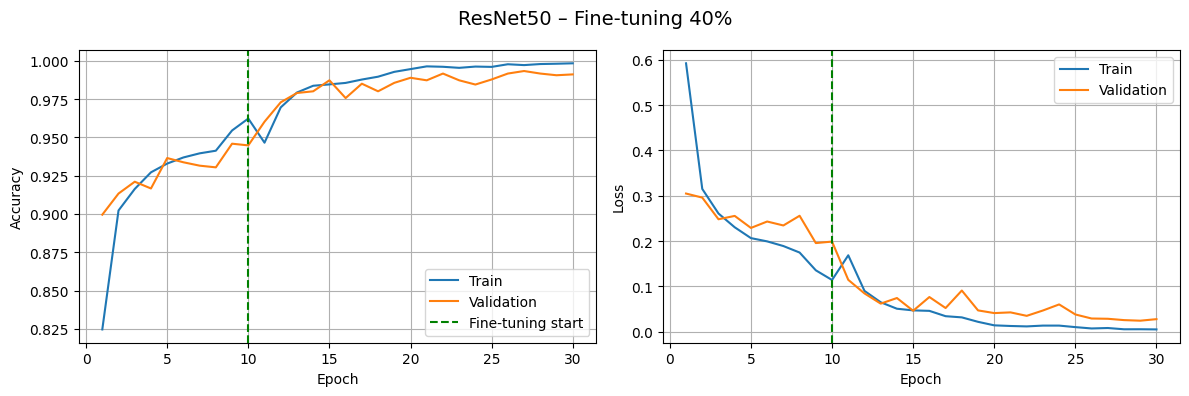

In [ ]:
hist_rn_ft40 = merge_histories(
    hist_rn_ft40_stage1,
    hist_rn_ft40_stage2
)

ft_start = len(hist_rn_ft40_stage1.history["loss"])

plot_training_history(
    hist_rn_ft40,
    title="ResNet50 – Fine-tuning 40%",
    ft_start_epoch=ft_start
)


## MobileNetV2

### Skema 1 Freeze All

In [ ]:
base = MobileNetV2(
    weights="imagenet",
    include_top=False,
    input_shape=INPUT_SHAPE
)

model_mnv2_freeze = build_model(base)
freeze_backbone(base)

model_mnv2_freeze.compile(
    optimizer=optimizers.Adam(LR_HEAD),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

hist_mnv2_freeze = model_mnv2_freeze.fit(
    train_mobilenet,
    validation_data=val_mobilenet,
    epochs=EPOCHS_FREEZE_ALL,
    callbacks=get_callbacks("mobilenetv2", "freeze_all")
)

loss_mnv2_A, acc_mnv2_A = model_mnv2_freeze.evaluate(test_mobilenet)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/30


2026-01-06 01:18:42.155140: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-06 01:18:42.314477: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-06 01:18:42.451813: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


453/454 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - accuracy: 0.6838 - loss: 1.0818

2026-01-06 01:19:52.913278: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-06 01:19:53.050413: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


454/454 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step - accuracy: 0.6840 - loss: 1.0811

2026-01-06 01:20:08.691818: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-06 01:20:08.829137: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


454/454 ━━━━━━━━━━━━━━━━━━━━ 103s 191ms/step - accuracy: 0.6841 - loss: 1.0805 - val_accuracy: 0.8825 - val_loss: 0.3501 - learning_rate: 0.0010
Epoch 2/30
454/454 ━━━━━━━━━━━━━━━━━━━━ 63s 138ms/step - accuracy: 0.8321 - loss: 0.5093 - val_accuracy: 0.8847 - val_loss: 0.3146 - learning_rate: 0.0010
Epoch 3/30
454/454 ━━━━━━━━━━━━━━━━━━━━ 64s 139ms/step - accuracy: 0.8498 - loss: 0.4481 - val_accuracy: 0.8979 - val_loss: 0.2878 - learning_rate: 0.0010
Epoch 4/30
454/454 ━━━━━━━━━━━━━━━━━━━━ 62s 136ms/step - accuracy: 0.8683 - loss: 0.3770 - val_accuracy: 0.9045 - val_loss: 0.2705 - learning_rate: 0.0010
Epoch 5/30
454/454 ━━━━━━━━━━━━━━━━━━━━ 62s 135ms/step - accuracy: 0.8746 - loss: 0.3733 - val_accuracy: 0.8935 - val_loss: 0.2744 - learning_rate: 0.0010
Epoch 6/30
454/454 ━━━━━━━━━━━━━━━━━━━━ 63s 139ms/step - accuracy: 0.8765 - loss: 0.3657 - val_accuracy: 0.9018 - val_loss: 0.2644 - learning_rate: 0.0010
Epoch 7/30
454/454 ━━━━━━━━━━━━━━━━━━━━ 63s 137ms/step - accuracy: 0.8902 - loss

2026-01-06 01:44:22.402077: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-06 01:44:22.560505: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-06 01:44:22.694941: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


58/58 ━━━━━━━━━━━━━━━━━━━━ 11s 185ms/step - accuracy: 0.9073 - loss: 0.2892


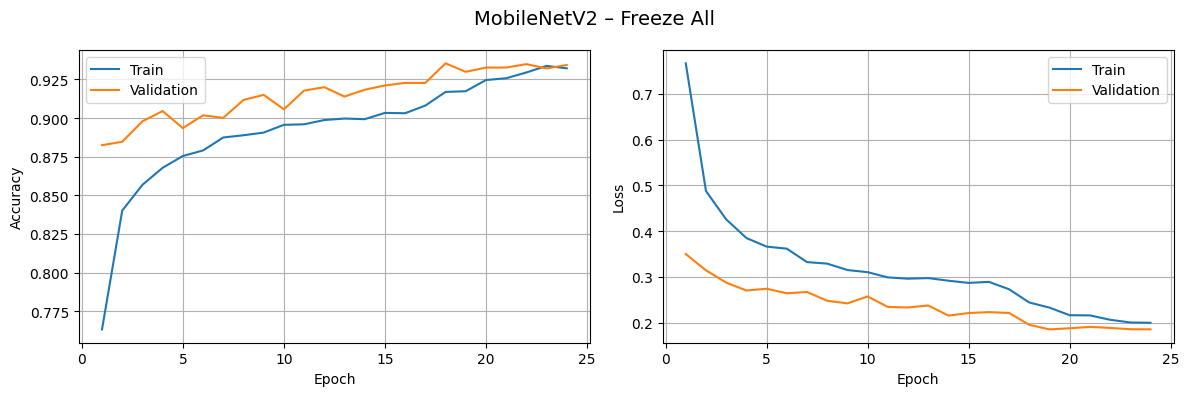

In [ ]:
plot_training_history(
    hist_mnv2_freeze,
    title="MobileNetV2 – Freeze All"
)

### Skema 2 Fine Tuning 20% layer

In [ ]:
base_mobilenetv2 = MobileNetV2(
    weights="imagenet",
    include_top=False,
    input_shape=INPUT_SHAPE
)

model_mobilenetv2_ft20 = build_model(base_mobilenetv2)
freeze_backbone(base_mobilenetv2)

model_mobilenetv2_ft20.compile(
    optimizer=optimizers.Adam(LR_HEAD),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

hist_mobilenetv2_ft20_stage1 = model_mobilenetv2_ft20.fit(
    train_mobilenet,
    validation_data=val_mobilenet,
    epochs=EPOCHS_FREEZE,
    initial_epoch=0,
    callbacks=get_callbacks("mobilenetv2", "ft20_warmup")
)

Epoch 1/10
454/454 ━━━━━━━━━━━━━━━━━━━━ 85s 166ms/step - accuracy: 0.6815 - loss: 1.0260 - val_accuracy: 0.8797 - val_loss: 0.3537 - learning_rate: 0.0010
Epoch 2/10
454/454 ━━━━━━━━━━━━━━━━━━━━ 64s 140ms/step - accuracy: 0.8321 - loss: 0.5163 - val_accuracy: 0.8797 - val_loss: 0.3325 - learning_rate: 0.0010
Epoch 3/10
454/454 ━━━━━━━━━━━━━━━━━━━━ 63s 138ms/step - accuracy: 0.8524 - loss: 0.4398 - val_accuracy: 0.9051 - val_loss: 0.2872 - learning_rate: 0.0010
Epoch 4/10
454/454 ━━━━━━━━━━━━━━━━━━━━ 61s 134ms/step - accuracy: 0.8698 - loss: 0.4044 - val_accuracy: 0.9056 - val_loss: 0.2691 - learning_rate: 0.0010
Epoch 5/10
454/454 ━━━━━━━━━━━━━━━━━━━━ 64s 139ms/step - accuracy: 0.8772 - loss: 0.3732 - val_accuracy: 0.9150 - val_loss: 0.2554 - learning_rate: 0.0010
Epoch 6/10
454/454 ━━━━━━━━━━━━━━━━━━━━ 64s 140ms/step - accuracy: 0.8836 - loss: 0.3446 - val_accuracy: 0.9134 - val_loss: 0.2475 - learning_rate: 0.0010
Epoch 7/10
454/454 ━━━━━━━━━━━━━━━━━━━━ 63s 138ms/step - accuracy: 0.8

In [ ]:
unfreeze_backbone(base_mobilenetv2, 0.2)

model_mobilenetv2_ft20.compile(
    optimizer=optimizers.Adam(LR_FINE),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

hist_mobilenetv2_ft20_stage2 = model_mobilenetv2_ft20.fit(
    train_mobilenet,
    validation_data=val_mobilenet,
    epochs=EPOCHS_FREEZE + EPOCHS_FINE,
    initial_epoch=EPOCHS_FREEZE,
    callbacks=get_callbacks("mobilenetv2", "ft20")
)

loss_mobilenetv2_B, acc_mobilenetv2_B = model_mobilenetv2_ft20.evaluate(test_mobilenet)

Epoch 11/30
454/454 ━━━━━━━━━━━━━━━━━━━━ 93s 169ms/step - accuracy: 0.8521 - loss: 0.4488 - val_accuracy: 0.5635 - val_loss: 5.2681 - learning_rate: 1.0000e-04
Epoch 12/30
454/454 ━━━━━━━━━━━━━━━━━━━━ 65s 142ms/step - accuracy: 0.9253 - loss: 0.2315 - val_accuracy: 0.6247 - val_loss: 3.5486 - learning_rate: 1.0000e-04
Epoch 13/30
454/454 ━━━━━━━━━━━━━━━━━━━━ 63s 137ms/step - accuracy: 0.9383 - loss: 0.1810 - val_accuracy: 0.6965 - val_loss: 1.8408 - learning_rate: 1.0000e-04
Epoch 14/30
454/454 ━━━━━━━━━━━━━━━━━━━━ 63s 138ms/step - accuracy: 0.9519 - loss: 0.1462 - val_accuracy: 0.6363 - val_loss: 3.5429 - learning_rate: 1.0000e-04
Epoch 15/30
454/454 ━━━━━━━━━━━━━━━━━━━━ 61s 134ms/step - accuracy: 0.9629 - loss: 0.1171 - val_accuracy: 0.7434 - val_loss: 2.0683 - learning_rate: 1.0000e-04
Epoch 16/30
454/454 ━━━━━━━━━━━━━━━━━━━━ 64s 139ms/step - accuracy: 0.9672 - loss: 0.1007 - val_accuracy: 0.8135 - val_loss: 1.0085 - learning_rate: 1.0000e-04
Epoch 17/30
454/454 ━━━━━━━━━━━━━━━━━━━━

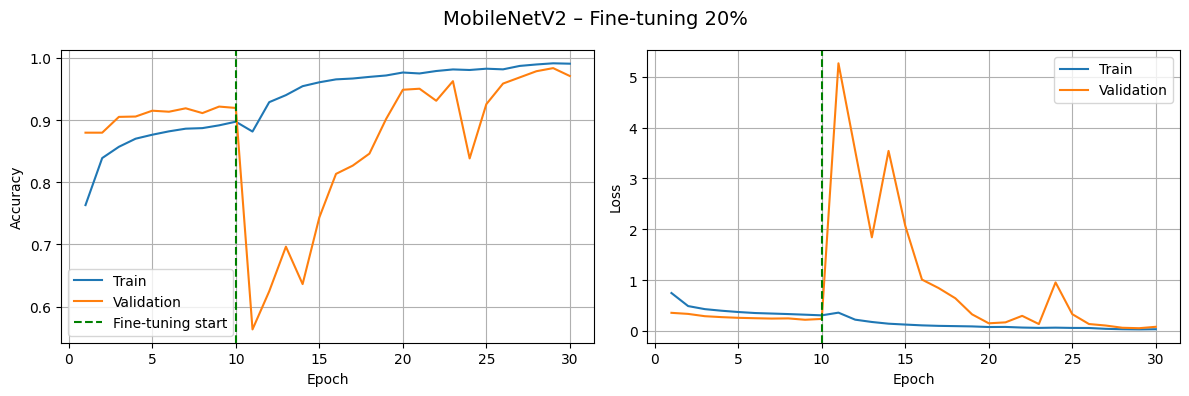

In [ ]:
hist_mobilenetv2_ft20 = merge_histories(
    hist_mobilenetv2_ft20_stage1,
    hist_mobilenetv2_ft20_stage2
)

ft_start = len(hist_mobilenetv2_ft20_stage1.history["loss"])

plot_training_history(
    hist_mobilenetv2_ft20,
    title="MobileNetV2 – Fine-tuning 20%",
    ft_start_epoch=ft_start
)

### Skema 3 Fine Tuning 40% layer

In [ ]:
base_mobilenetv2 = MobileNetV2(
    weights="imagenet",
    include_top=False,
    input_shape=INPUT_SHAPE
)

model_mobilenetv2_ft40 = build_model(base_mobilenetv2)
freeze_backbone(base_mobilenetv2)

model_mobilenetv2_ft40.compile(
    optimizer=optimizers.Adam(LR_HEAD),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

hist_mobilenetv2_ft40_stage1 = model_mobilenetv2_ft40.fit(
    train_mobilenet,
    validation_data=val_mobilenet,
    epochs=EPOCHS_FREEZE,
    initial_epoch=0,
    callbacks=get_callbacks("mobilenetv2", "ft40_warmup")
)

Epoch 1/10
454/454 ━━━━━━━━━━━━━━━━━━━━ 84s 164ms/step - accuracy: 0.6921 - loss: 1.0267 - val_accuracy: 0.8736 - val_loss: 0.3672 - learning_rate: 0.0010
Epoch 2/10
454/454 ━━━━━━━━━━━━━━━━━━━━ 63s 137ms/step - accuracy: 0.8352 - loss: 0.5048 - val_accuracy: 0.8885 - val_loss: 0.3064 - learning_rate: 0.0010
Epoch 3/10
454/454 ━━━━━━━━━━━━━━━━━━━━ 62s 136ms/step - accuracy: 0.8520 - loss: 0.4522 - val_accuracy: 0.8841 - val_loss: 0.3159 - learning_rate: 0.0010
Epoch 4/10
454/454 ━━━━━━━━━━━━━━━━━━━━ 65s 142ms/step - accuracy: 0.8699 - loss: 0.3913 - val_accuracy: 0.9051 - val_loss: 0.2905 - learning_rate: 0.0010
Epoch 5/10
454/454 ━━━━━━━━━━━━━━━━━━━━ 64s 139ms/step - accuracy: 0.8762 - loss: 0.3697 - val_accuracy: 0.9134 - val_loss: 0.2525 - learning_rate: 0.0010
Epoch 6/10
454/454 ━━━━━━━━━━━━━━━━━━━━ 64s 141ms/step - accuracy: 0.8819 - loss: 0.3618 - val_accuracy: 0.9067 - val_loss: 0.2442 - learning_rate: 0.0010
Epoch 7/10
454/454 ━━━━━━━━━━━━━━━━━━━━ 64s 139ms/step - accuracy: 0.8

In [ ]:
unfreeze_backbone(base_mobilenetv2, 0.2)

model_mobilenetv2_ft40.compile(
    optimizer=optimizers.Adam(LR_FINE),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

hist_mobilenetv2_ft40_stage2 = model_mobilenetv2_ft40.fit(
    train_mobilenet,
    validation_data=val_mobilenet,
    epochs=EPOCHS_FREEZE + EPOCHS_FINE,
    initial_epoch=EPOCHS_FREEZE,
    callbacks=get_callbacks("mobilenetv2", "ft40")
)

loss_mobilenetv2_c, acc_mobilenetv2_c = model_mobilenetv2_ft40.evaluate(test_mobilenet)

Epoch 11/30
454/454 ━━━━━━━━━━━━━━━━━━━━ 94s 172ms/step - accuracy: 0.8527 - loss: 0.4523 - val_accuracy: 0.5662 - val_loss: 6.3488 - learning_rate: 1.0000e-04
Epoch 12/30
454/454 ━━━━━━━━━━━━━━━━━━━━ 65s 142ms/step - accuracy: 0.9229 - loss: 0.2348 - val_accuracy: 0.6981 - val_loss: 2.6922 - learning_rate: 1.0000e-04
Epoch 13/30
454/454 ━━━━━━━━━━━━━━━━━━━━ 64s 141ms/step - accuracy: 0.9393 - loss: 0.1866 - val_accuracy: 0.7555 - val_loss: 1.7781 - learning_rate: 1.0000e-04
Epoch 14/30
454/454 ━━━━━━━━━━━━━━━━━━━━ 63s 139ms/step - accuracy: 0.9524 - loss: 0.1509 - val_accuracy: 0.7224 - val_loss: 1.9470 - learning_rate: 1.0000e-04
Epoch 15/30
454/454 ━━━━━━━━━━━━━━━━━━━━ 64s 139ms/step - accuracy: 0.9578 - loss: 0.1291 - val_accuracy: 0.7047 - val_loss: 2.2932 - learning_rate: 1.0000e-04
Epoch 16/30
454/454 ━━━━━━━━━━━━━━━━━━━━ 64s 140ms/step - accuracy: 0.9642 - loss: 0.1043 - val_accuracy: 0.8201 - val_loss: 0.8254 - learning_rate: 1.0000e-04
Epoch 17/30
454/454 ━━━━━━━━━━━━━━━━━━━━

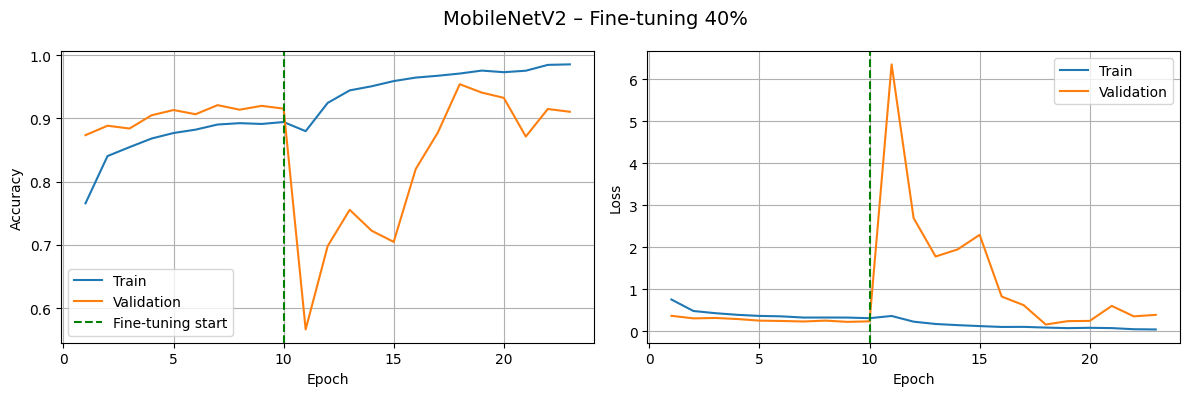

In [ ]:
hist_mobilenetv2_ft40 = merge_histories(
    hist_mobilenetv2_ft40_stage1,
    hist_mobilenetv2_ft40_stage2
)

ft_start = len(hist_mobilenetv2_ft40_stage1.history["loss"])

plot_training_history(
    hist_mobilenetv2_ft40,
    title="MobileNetV2 – Fine-tuning 40%",
    ft_start_epoch=ft_start
)

## EfficientNetB0

### Skema 1 Freeze All

In [ ]:
base = EfficientNetB0(
    weights="imagenet",
    include_top=False,
    input_shape=INPUT_SHAPE
)

model_eff_freeze = build_model(base)
freeze_backbone(base)

model_eff_freeze.compile(
    optimizer=optimizers.Adam(LR_HEAD),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

hist_eff_freeze = model_eff_freeze.fit(
    train_efficient,
    validation_data=val_efficient,
    epochs=EPOCHS_FREEZE_ALL,
    callbacks=get_callbacks("efficientnetb0", "freeze_all")
)

loss_eff_A, acc_eff_A = model_eff_freeze.evaluate(test_efficient)


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/30


2026-01-06 02:43:35.462601: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-06 02:43:35.605967: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-06 02:43:35.954830: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-06 02:43:36.096843: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-06 02:43:36.239577: E external/local_xla/xla/stream_

453/454 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - accuracy: 0.6992 - loss: 1.0048

2026-01-06 02:44:50.109431: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-06 02:44:50.252129: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-06 02:44:50.592735: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-06 02:44:50.733605: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-06 02:44:51.438029: E external/local_xla/xla/stream_

454/454 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step - accuracy: 0.6994 - loss: 1.0041

2026-01-06 02:45:08.902518: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-06 02:45:09.043509: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-06 02:45:09.372992: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-06 02:45:09.513763: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-06 02:45:10.226069: E external/local_xla/xla/stream_

454/454 ━━━━━━━━━━━━━━━━━━━━ 114s 201ms/step - accuracy: 0.6996 - loss: 1.0034 - val_accuracy: 0.9040 - val_loss: 0.2865 - learning_rate: 0.0010
Epoch 2/30
454/454 ━━━━━━━━━━━━━━━━━━━━ 64s 140ms/step - accuracy: 0.8642 - loss: 0.4103 - val_accuracy: 0.9167 - val_loss: 0.2414 - learning_rate: 0.0010
Epoch 3/30
454/454 ━━━━━━━━━━━━━━━━━━━━ 66s 144ms/step - accuracy: 0.8825 - loss: 0.3596 - val_accuracy: 0.9172 - val_loss: 0.2450 - learning_rate: 0.0010
Epoch 4/30
454/454 ━━━━━━━━━━━━━━━━━━━━ 63s 137ms/step - accuracy: 0.9046 - loss: 0.2862 - val_accuracy: 0.9305 - val_loss: 0.2137 - learning_rate: 0.0010
Epoch 5/30
454/454 ━━━━━━━━━━━━━━━━━━━━ 63s 138ms/step - accuracy: 0.9092 - loss: 0.2686 - val_accuracy: 0.9299 - val_loss: 0.1899 - learning_rate: 0.0010
Epoch 6/30
454/454 ━━━━━━━━━━━━━━━━━━━━ 63s 138ms/step - accuracy: 0.9128 - loss: 0.2573 - val_accuracy: 0.9227 - val_loss: 0.2239 - learning_rate: 0.0010
Epoch 7/30
454/454 ━━━━━━━━━━━━━━━━━━━━ 63s 138ms/step - accuracy: 0.9153 - loss

2026-01-06 03:08:25.286977: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-06 03:08:25.423037: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-06 03:08:26.091623: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-06 03:08:26.227341: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


58/58 ━━━━━━━━━━━━━━━━━━━━ 9s 162ms/step - accuracy: 0.9410 - loss: 0.1957


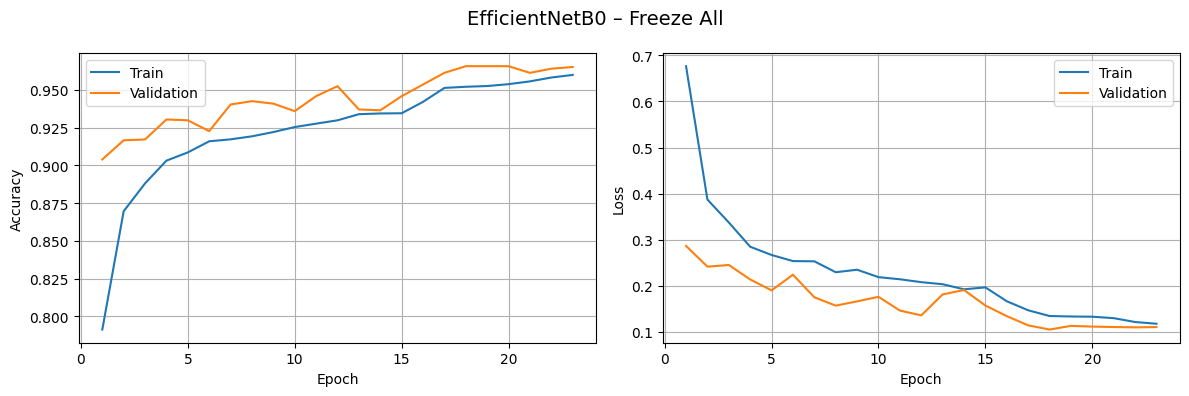

In [ ]:
plot_training_history(
    hist_eff_freeze,
    title="EfficientNetB0 – Freeze All"
)

### Skema 2 Fine Tuning 20% Layer

In [ ]:
base = EfficientNetB0(
    weights="imagenet",
    include_top=False,
    input_shape=INPUT_SHAPE
)

model_eff_ft20 = build_model(base)
freeze_backbone(base)

model_eff_ft20.compile(
    optimizer=optimizers.Adam(LR_HEAD),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

hist_eff_ft20_stage1 = model_eff_ft20.fit(
    train_efficient,
    validation_data=val_efficient,
    epochs=EPOCHS_FREEZE,
    initial_epoch=0,
    callbacks=get_callbacks("efficientnetb0", "ft20_warmup")
)


Epoch 1/10
454/454 ━━━━━━━━━━━━━━━━━━━━ 101s 182ms/step - accuracy: 0.7037 - loss: 0.9910 - val_accuracy: 0.8758 - val_loss: 0.3405 - learning_rate: 0.0010
Epoch 2/10
454/454 ━━━━━━━━━━━━━━━━━━━━ 63s 138ms/step - accuracy: 0.8659 - loss: 0.4098 - val_accuracy: 0.9145 - val_loss: 0.2508 - learning_rate: 0.0010
Epoch 3/10
454/454 ━━━━━━━━━━━━━━━━━━━━ 63s 139ms/step - accuracy: 0.8869 - loss: 0.3298 - val_accuracy: 0.9255 - val_loss: 0.2058 - learning_rate: 0.0010
Epoch 4/10
454/454 ━━━━━━━━━━━━━━━━━━━━ 63s 138ms/step - accuracy: 0.9013 - loss: 0.2969 - val_accuracy: 0.9272 - val_loss: 0.2045 - learning_rate: 0.0010
Epoch 5/10
454/454 ━━━━━━━━━━━━━━━━━━━━ 63s 137ms/step - accuracy: 0.9073 - loss: 0.2781 - val_accuracy: 0.9437 - val_loss: 0.1700 - learning_rate: 0.0010
Epoch 6/10
454/454 ━━━━━━━━━━━━━━━━━━━━ 63s 139ms/step - accuracy: 0.9109 - loss: 0.2587 - val_accuracy: 0.9404 - val_loss: 0.1714 - learning_rate: 0.0010
Epoch 7/10
454/454 ━━━━━━━━━━━━━━━━━━━━ 63s 137ms/step - accuracy: 0.

In [ ]:
unfreeze_backbone(base, 0.2)

model_eff_ft20.compile(
    optimizer=optimizers.Adam(LR_FINE),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

hist_eff_ft20_stage2 = model_eff_ft20.fit(
    train_efficient,
    validation_data=val_efficient,
    epochs=EPOCHS_FREEZE + EPOCHS_FINE,
    initial_epoch=EPOCHS_FREEZE,
    callbacks=get_callbacks("efficientnetb0", "ft20")
)

loss_eff_B, acc_eff_B = model_eff_ft20.evaluate(test_efficient)

Epoch 11/30
454/454 ━━━━━━━━━━━━━━━━━━━━ 116s 194ms/step - accuracy: 0.8732 - loss: 0.4007 - val_accuracy: 0.9514 - val_loss: 0.1627 - learning_rate: 1.0000e-04
Epoch 12/30
454/454 ━━━━━━━━━━━━━━━━━━━━ 65s 143ms/step - accuracy: 0.9413 - loss: 0.1779 - val_accuracy: 0.9658 - val_loss: 0.1094 - learning_rate: 1.0000e-04
Epoch 13/30
454/454 ━━━━━━━━━━━━━━━━━━━━ 64s 141ms/step - accuracy: 0.9561 - loss: 0.1319 - val_accuracy: 0.9636 - val_loss: 0.1018 - learning_rate: 1.0000e-04
Epoch 14/30
454/454 ━━━━━━━━━━━━━━━━━━━━ 64s 140ms/step - accuracy: 0.9617 - loss: 0.1100 - val_accuracy: 0.9685 - val_loss: 0.1029 - learning_rate: 1.0000e-04
Epoch 15/30
454/454 ━━━━━━━━━━━━━━━━━━━━ 64s 140ms/step - accuracy: 0.9695 - loss: 0.0914 - val_accuracy: 0.9724 - val_loss: 0.0678 - learning_rate: 1.0000e-04
Epoch 16/30
454/454 ━━━━━━━━━━━━━━━━━━━━ 63s 138ms/step - accuracy: 0.9754 - loss: 0.0768 - val_accuracy: 0.9774 - val_loss: 0.0687 - learning_rate: 1.0000e-04
Epoch 17/30
454/454 ━━━━━━━━━━━━━━━━━━━

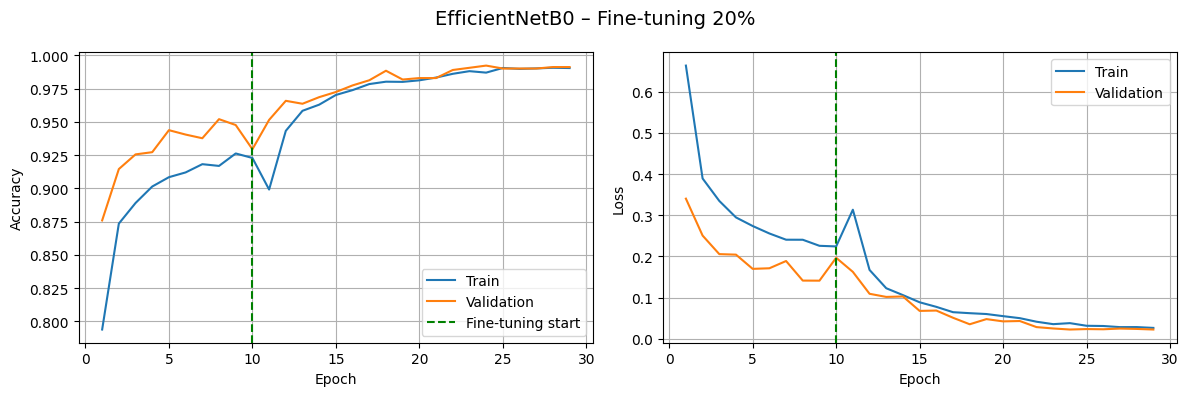

In [ ]:
hist_efficientnet_ft20 = merge_histories(
    hist_eff_ft20_stage1,
    hist_eff_ft20_stage2
)

ft_start = len(hist_eff_ft20_stage1.history["loss"])

plot_training_history(
    hist_efficientnet_ft20,
    title="EfficientNetB0 – Fine-tuning 20%",
    ft_start_epoch=ft_start
)

### Skema 3 Fine Tuning 40% layer

In [ ]:
base = EfficientNetB0(
    weights="imagenet",
    include_top=False,
    input_shape=INPUT_SHAPE
)

model_eff_ft40 = build_model(base)
freeze_backbone(base)

model_eff_ft40.compile(
    optimizer=optimizers.Adam(LR_HEAD),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

hist_eff_ft40_stage1 = model_eff_ft40.fit(
    train_efficient,
    validation_data=val_efficient,
    epochs=EPOCHS_FREEZE,
    initial_epoch=0,
    callbacks=get_callbacks("efficientnetb0", "ft40_warmup")
)


Epoch 1/10
454/454 ━━━━━━━━━━━━━━━━━━━━ 101s 180ms/step - accuracy: 0.7058 - loss: 0.9725 - val_accuracy: 0.8825 - val_loss: 0.3281 - learning_rate: 0.0010
Epoch 2/10
454/454 ━━━━━━━━━━━━━━━━━━━━ 64s 140ms/step - accuracy: 0.8657 - loss: 0.4133 - val_accuracy: 0.9183 - val_loss: 0.2367 - learning_rate: 0.0010
Epoch 3/10
454/454 ━━━━━━━━━━━━━━━━━━━━ 62s 137ms/step - accuracy: 0.8941 - loss: 0.3266 - val_accuracy: 0.9123 - val_loss: 0.2400 - learning_rate: 0.0010
Epoch 4/10
454/454 ━━━━━━━━━━━━━━━━━━━━ 64s 140ms/step - accuracy: 0.9061 - loss: 0.2804 - val_accuracy: 0.9205 - val_loss: 0.2209 - learning_rate: 0.0010
Epoch 5/10
454/454 ━━━━━━━━━━━━━━━━━━━━ 65s 143ms/step - accuracy: 0.9119 - loss: 0.2764 - val_accuracy: 0.9332 - val_loss: 0.1911 - learning_rate: 0.0010
Epoch 6/10
454/454 ━━━━━━━━━━━━━━━━━━━━ 64s 140ms/step - accuracy: 0.9144 - loss: 0.2708 - val_accuracy: 0.9487 - val_loss: 0.1519 - learning_rate: 0.0010
Epoch 7/10
454/454 ━━━━━━━━━━━━━━━━━━━━ 63s 138ms/step - accuracy: 0.

In [ ]:
unfreeze_backbone(base, 0.4)

model_eff_ft40.compile(
    optimizer=optimizers.Adam(LR_FINE),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

hist_eff_ft40_stage2 = model_eff_ft40.fit(
    train_efficient,
    validation_data=val_efficient,
    epochs=EPOCHS_FREEZE + EPOCHS_FINE,
    initial_epoch=EPOCHS_FREEZE,
    callbacks=get_callbacks("efficientnetb0", "ft40")
)

loss_eff_c, acc_eff_c = model_eff_ft40.evaluate(test_efficient)

Epoch 11/30


2026-01-06 03:53:56.177253: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-06 03:53:56.337330: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-06 03:53:56.488528: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


453/454 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - accuracy: 0.8581 - loss: 0.4570

2026-01-06 03:55:16.247284: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-06 03:55:16.396895: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-06 03:55:16.544419: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-06 03:55:16.923270: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-06 03:55:17.066076: E external/local_xla/xla/stream_

454/454 ━━━━━━━━━━━━━━━━━━━━ 132s 208ms/step - accuracy: 0.8583 - loss: 0.4564 - val_accuracy: 0.9581 - val_loss: 0.1267 - learning_rate: 1.0000e-04
Epoch 12/30
454/454 ━━━━━━━━━━━━━━━━━━━━ 66s 143ms/step - accuracy: 0.9500 - loss: 0.1486 - val_accuracy: 0.9669 - val_loss: 0.0986 - learning_rate: 1.0000e-04
Epoch 13/30
454/454 ━━━━━━━━━━━━━━━━━━━━ 66s 144ms/step - accuracy: 0.9669 - loss: 0.1039 - val_accuracy: 0.9746 - val_loss: 0.0640 - learning_rate: 1.0000e-04
Epoch 14/30
454/454 ━━━━━━━━━━━━━━━━━━━━ 65s 143ms/step - accuracy: 0.9753 - loss: 0.0743 - val_accuracy: 0.9868 - val_loss: 0.0389 - learning_rate: 1.0000e-04
Epoch 15/30
454/454 ━━━━━━━━━━━━━━━━━━━━ 65s 142ms/step - accuracy: 0.9795 - loss: 0.0656 - val_accuracy: 0.9768 - val_loss: 0.0703 - learning_rate: 1.0000e-04
Epoch 16/30
454/454 ━━━━━━━━━━━━━━━━━━━━ 66s 144ms/step - accuracy: 0.9793 - loss: 0.0581 - val_accuracy: 0.9818 - val_loss: 0.0534 - learning_rate: 1.0000e-04
Epoch 17/30
454/454 ━━━━━━━━━━━━━━━━━━━━ 65s 142ms/

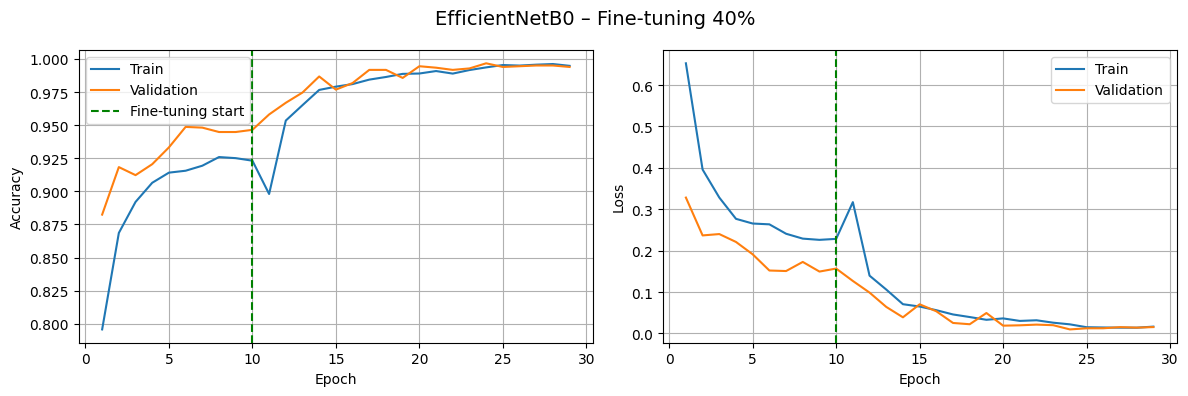

In [ ]:
hist_efficientnet_ft40 = merge_histories(
    hist_eff_ft40_stage1,
    hist_eff_ft40_stage2
)

ft_start = len(hist_eff_ft40_stage1.history["loss"])

plot_training_history(
    hist_efficientnet_ft40,
    title="EfficientNetB0 – Fine-tuning 40%",
    ft_start_epoch=ft_start
)

# Metric Evaluation

In [ ]:
def evaluate_models(models_dict, test_ds_dict, class_names, title):
    rows = []

    for model_name, model in models_dict.items():
        test_ds = test_ds_dict[model_name]

        y_true, y_pred = [], []

        for x, y in test_ds:
            preds = model.predict(x, verbose=0)
            y_true.extend(np.argmax(y.numpy(), axis=1))
            y_pred.extend(np.argmax(preds, axis=1))

        acc = accuracy_score(y_true, y_pred)
        prec, rec, f1, _ = precision_recall_fscore_support(
            y_true, y_pred, average="macro", zero_division=0
        )

        rows.append({
            "Model": model_name,
            "Accuracy": acc,
            "Precision": prec,
            "Recall": rec,
            "F1-score": f1
        })

        cm = confusion_matrix(y_true, y_pred)
        plt.figure(figsize=(10, 8))
        sns.heatmap(
            cm,
            cmap="Blues",
            xticklabels=display_names,
            yticklabels=display_names,
            annot=True
        )
        plt.title(f"{model_name} – {title}")
        plt.xlabel("Predicted")
        plt.ylabel("True")
        plt.xticks(rotation=45, ha="right")
        plt.yticks(rotation=0)
        plt.tight_layout()
        plt.show()

    return pd.DataFrame(rows)


## Evaluate Freeza All

In [ ]:
class_names = [
    "Tomato___Bacterial_spot",
    "Tomato___Early_blight",
    "Tomato___Late_blight",
    "Tomato___Leaf_Mold",
    "Tomato___Septoria_leaf_spot",
    "Tomato___Spider_mites Two-spotted_spider_mite",
    "Tomato___Target_Spot",
    "Tomato___Tomato_mosaic_virus",
    "Tomato___Tomato_Yellow_Leaf_Curl_Virus",
    "Tomato___healthy"
]

display_names = [
    "Bacterial spot",
    "Early blight",
    "Late blight",
    "Leaf mold",
    "Septoria leaf spot",
    "Spider mites",
    "Target spot",
    "Tomato mosaic virus",
    "Yellow leaf curl virus",
    "Healthy"
]

test_ds_dict = {
    "ResNet50": test_resnet,
    "MobileNetV2": test_mobilenet,
    "EfficientNetB0": test_efficient
}

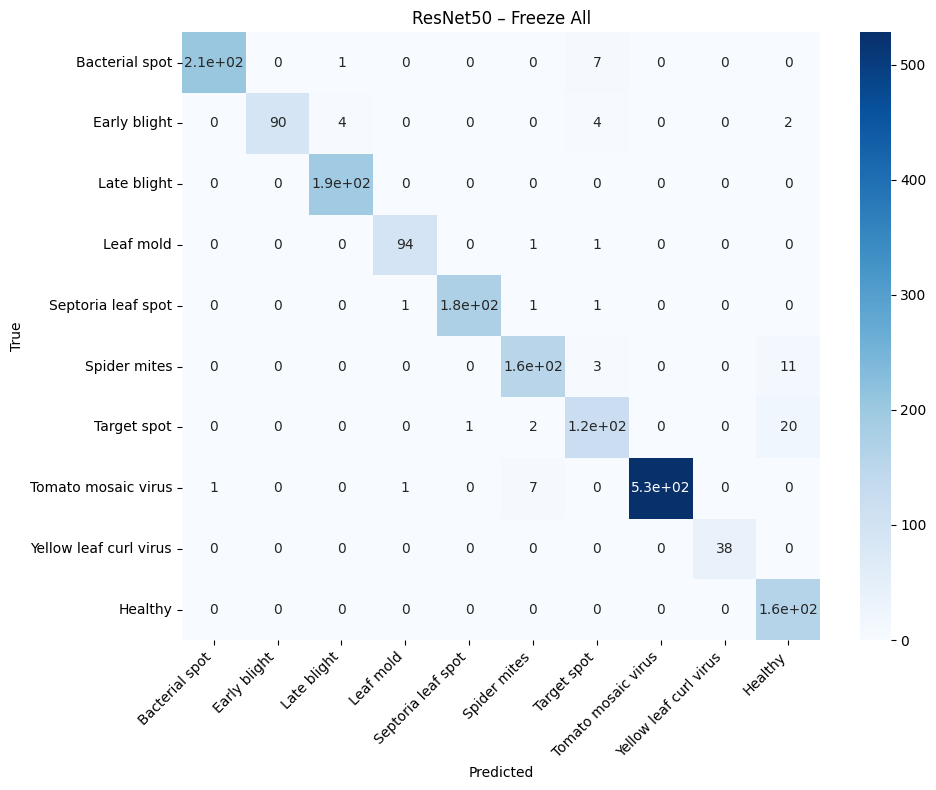

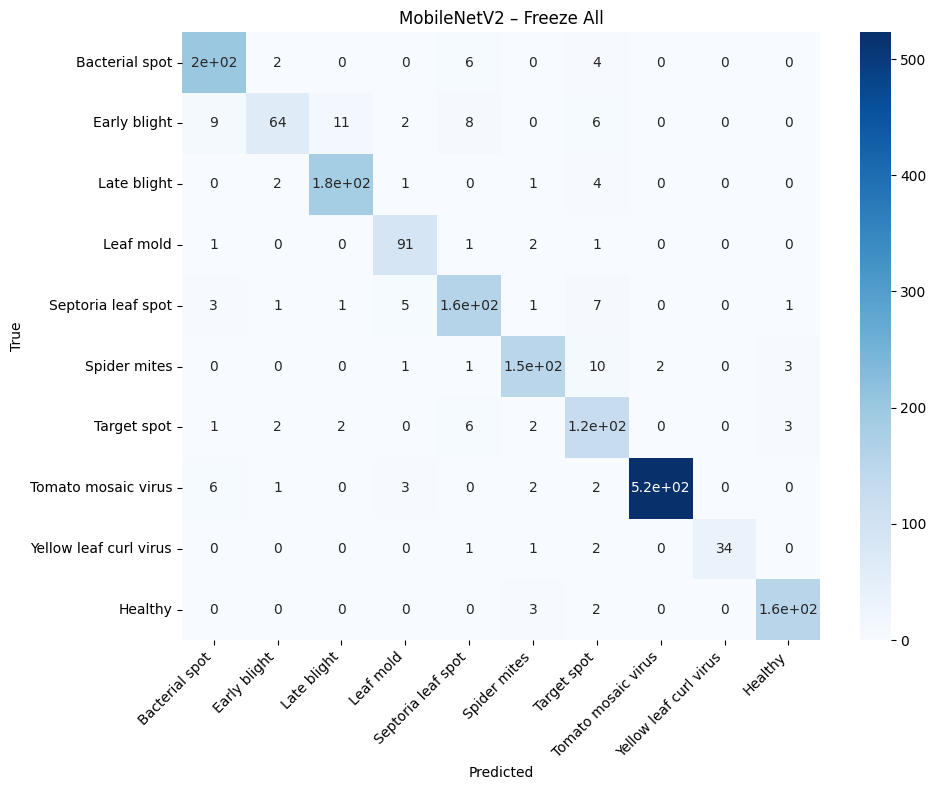

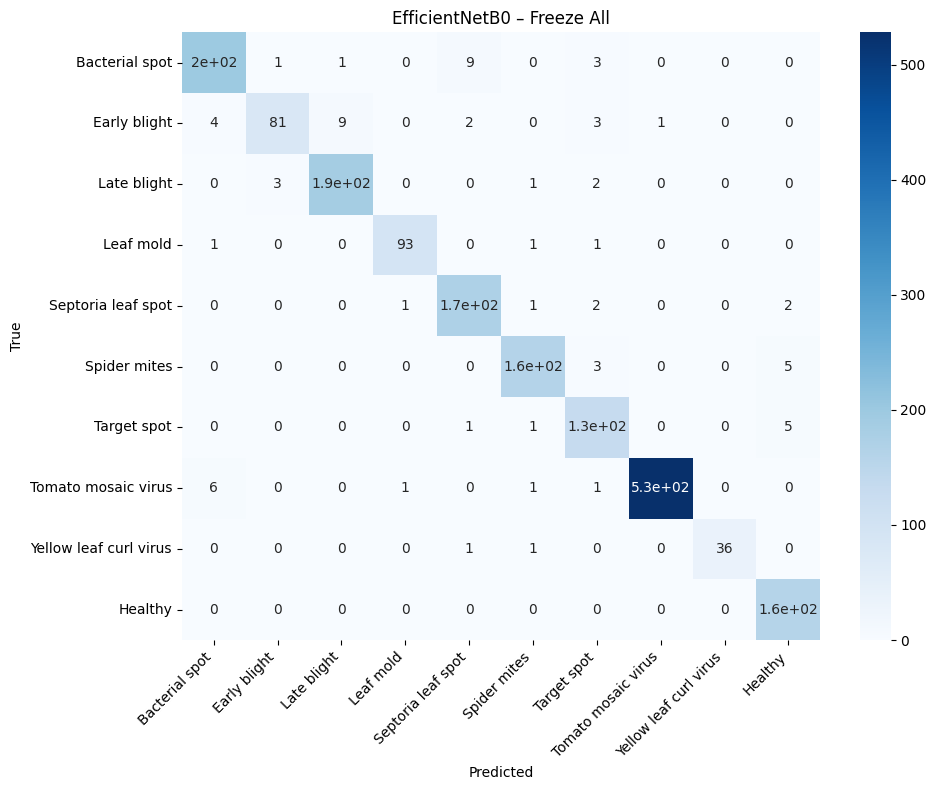

,Model,Accuracy,Precision,Recall,F1-score
0,ResNet50,0.962192,0.958662,0.956221,0.956262
1,MobileNetV2,0.925479,0.913189,0.900678,0.903968
2,EfficientNetB0,0.959452,0.955021,0.948200,0.950701


In [ ]:
models_freeze = {
    "ResNet50": model_rn_freeze,
    "MobileNetV2": model_mnv2_freeze,
    "EfficientNetB0": model_eff_freeze
}

df_freeze = evaluate_models(
    models_dict=models_freeze,
    test_ds_dict=test_ds_dict,
    class_names=class_names,
    title="Freeze All"
)

df_freeze

## Evaluate Fine Tuning 20%

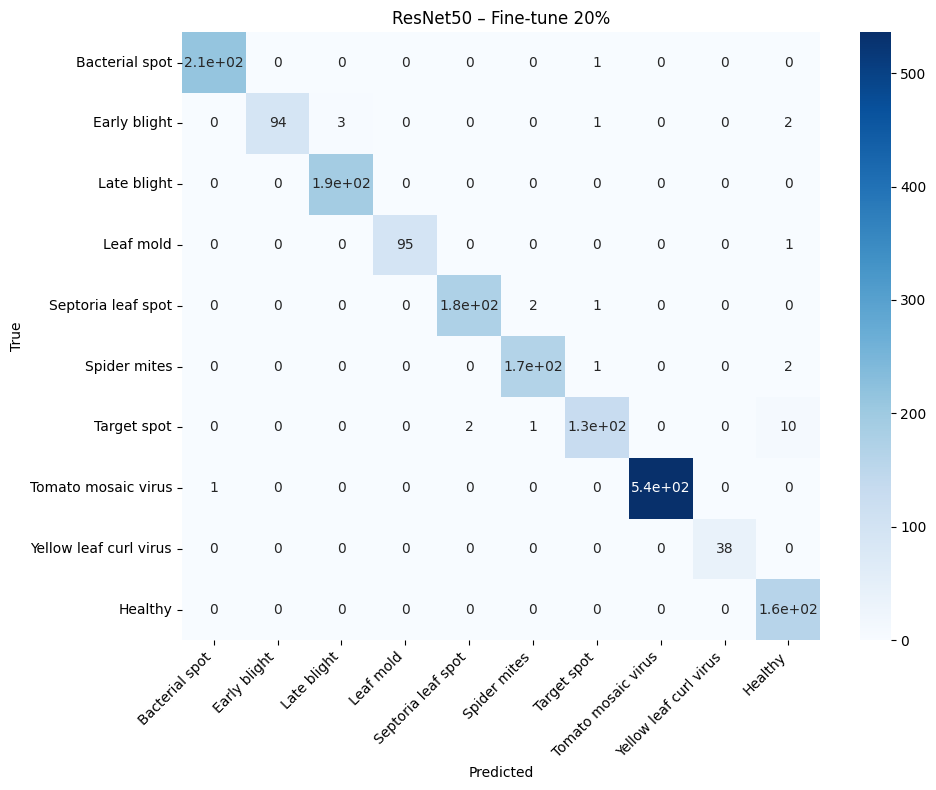

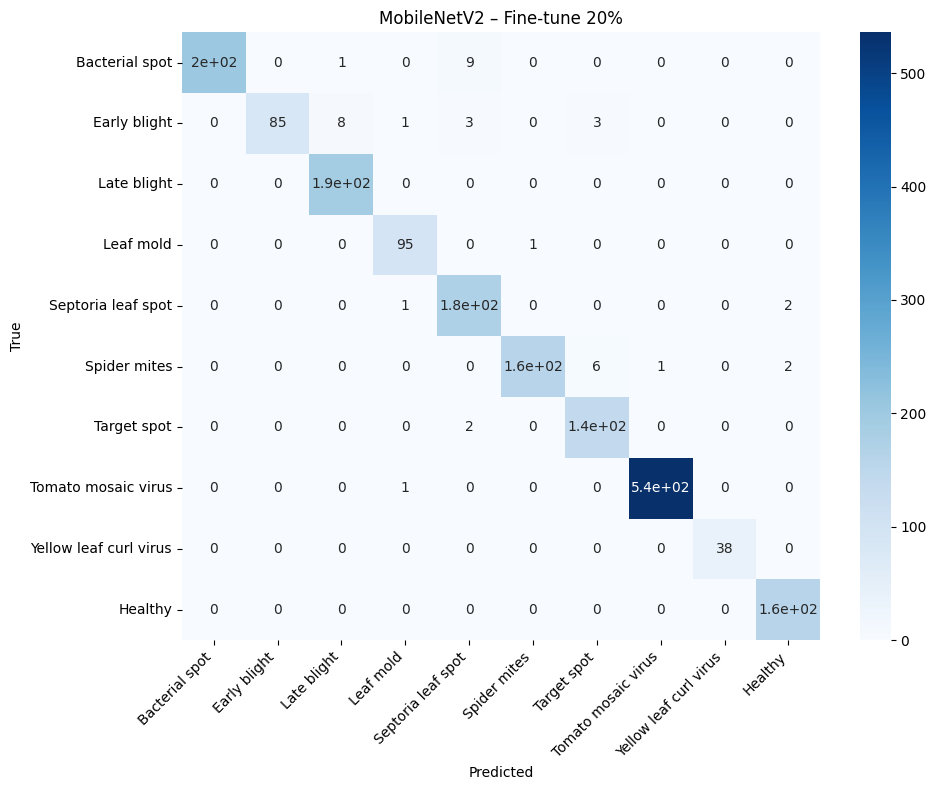

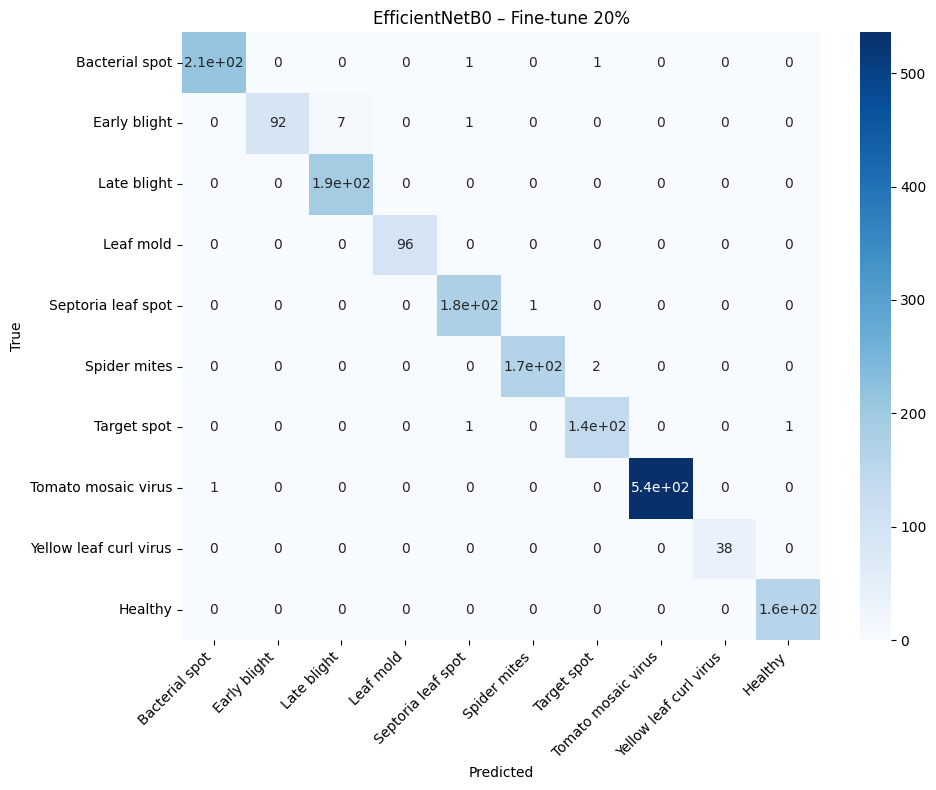

,Model,Accuracy,Precision,Recall,F1-score
0,ResNet50,0.984658,0.983487,0.979624,0.981160
1,MobileNetV2,0.977534,0.975726,0.970670,0.972258
2,EfficientNetB0,0.991233,0.991017,0.987716,0.989161


In [ ]:
models_ft20 = {
    "ResNet50": model_resnet_ft20,
    "MobileNetV2": model_mobilenetv2_ft20,
    "EfficientNetB0": model_eff_ft20
}

df_ft20 = evaluate_models(
    models_dict=models_ft20,
    test_ds_dict=test_ds_dict,
    class_names=class_names,
    title="Fine-tune 20%"
)

df_ft20

## Evaluate Fine Tuning 40%

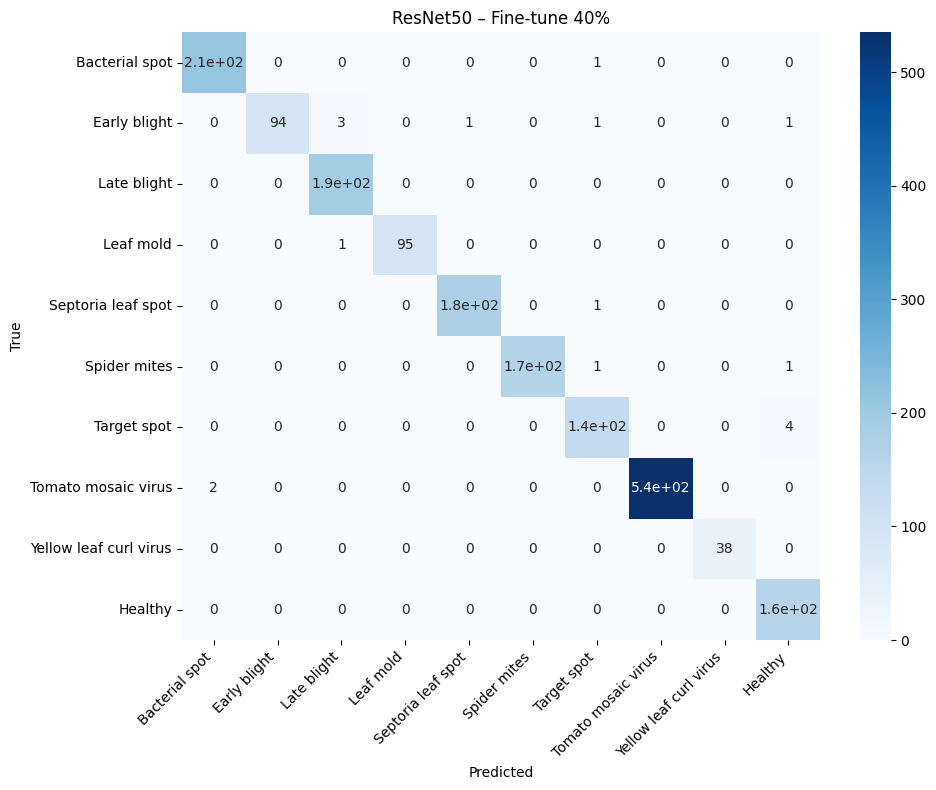

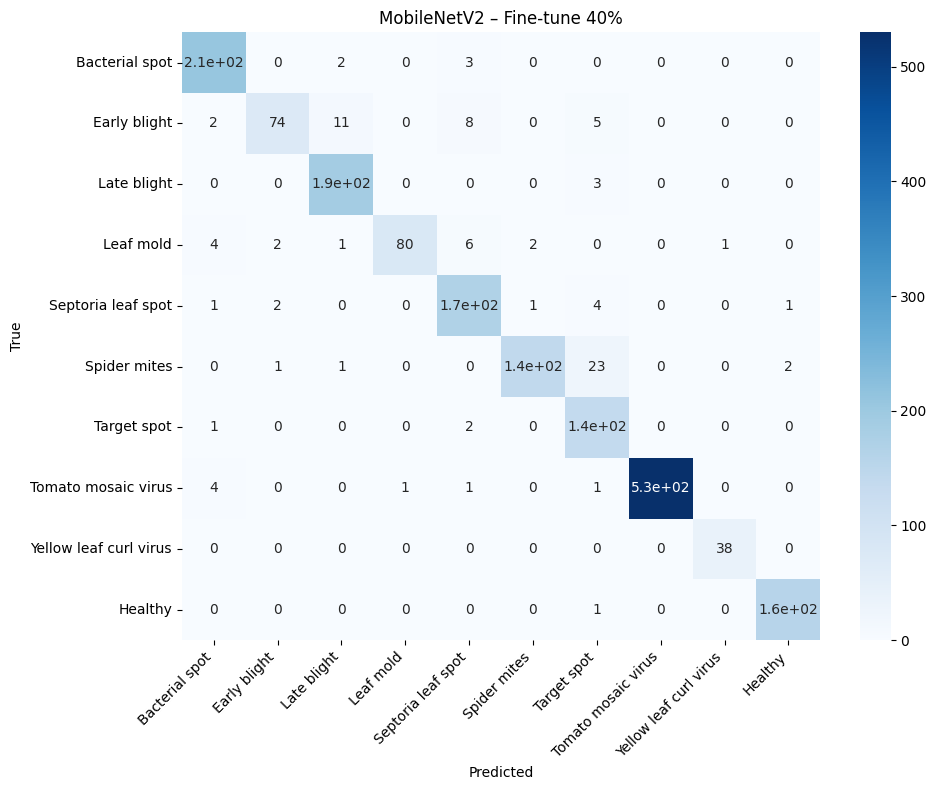

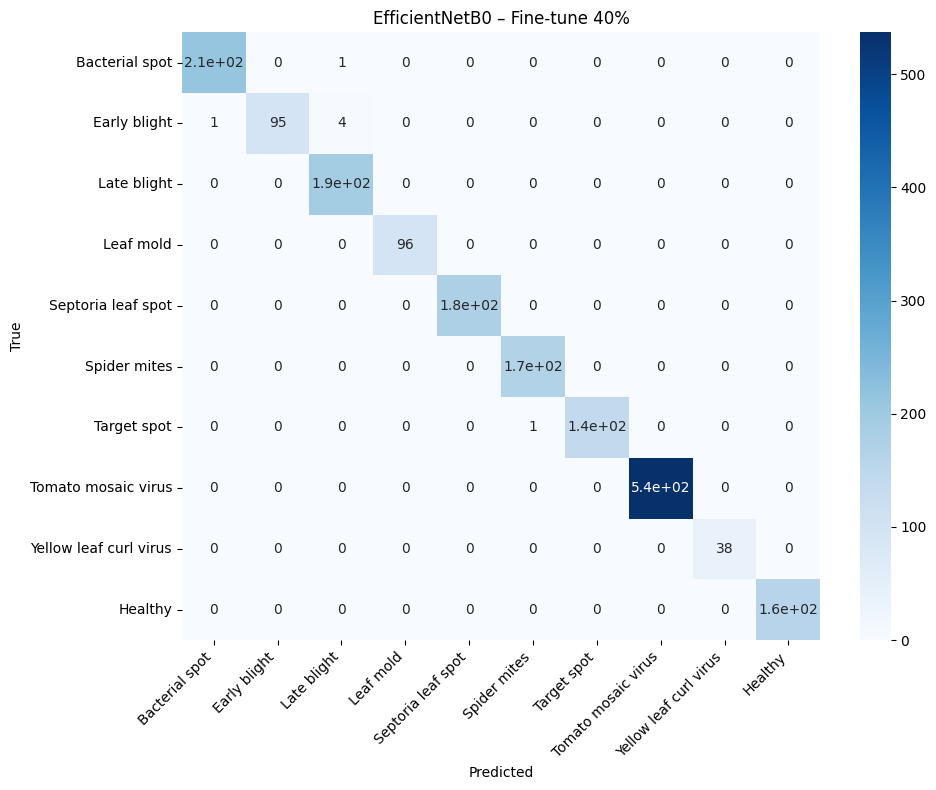

,Model,Accuracy,Precision,Recall,F1-score
0,ResNet50,0.990685,0.990016,0.987536,0.988632
1,MobileNetV2,0.946849,0.941444,0.928346,0.931312
2,EfficientNetB0,0.996164,0.996406,0.993823,0.995032


In [ ]:
models_ft40 = {
    "ResNet50": model_resnet_ft40,
    "MobileNetV2": model_mobilenetv2_ft40,
    "EfficientNetB0": model_eff_ft40
}

df_ft40 = evaluate_models(
    models_dict=models_ft40,
    test_ds_dict=test_ds_dict,
    class_names=class_names,
    title="Fine-tune 40%"
)

df_ft40